In [1]:
# create pylab environment, now able to use numpy and matplotlib libraries
%pylab inline

Populating the interactive namespace from numpy and matplotlib


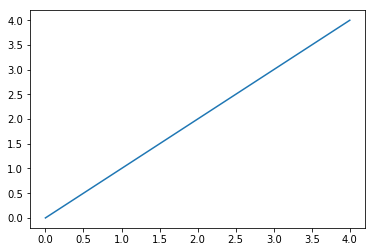

In [3]:
# test pylab environment by plotting an inline plot
plot(arange(5))

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# read data set into a dataframe using pandas
df = pd.read_csv("/Users/chrismiller/Downloads/train_u6lujuX_CVtuZ9i.csv")

In [7]:
# print the first 10 rows for the data set
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
# get a numerical summary for the numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Initial analysis: For the numeric data, we observe some of the columns are missing data (count < 614). It is also useful to compare the mean to the median (50%). 

In [13]:
# count the number of times each options comes up for Property_Area
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

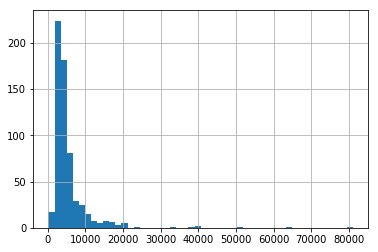

In [12]:
# view the numerical distribution for the ApplicantIncome data
df['ApplicantIncome'].hist(bins=50)

The histogram reveals a distribution that is highly concentrated in a small range between 0 and 10,000. 

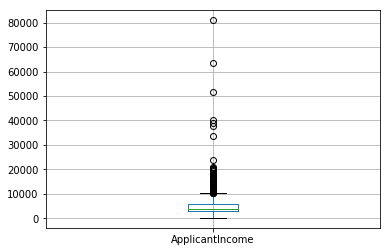

In [16]:
# show a boxplot for ApplicantIncome
df.boxplot(column='ApplicantIncome')

This boxplot helps see the previous results in another way. We can more clearly see the presence of outliers. One reason why we get these results could be due to the extreme distribution of wealth between individuals. It might be useful to see how dependent the applicant's income is by education. 

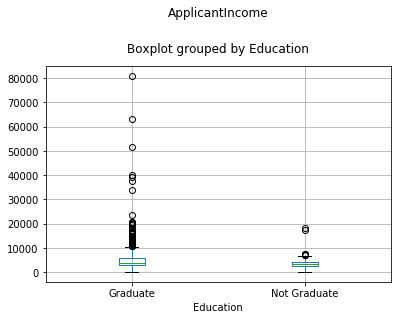

In [44]:
# separate out the previous boxplot by education level
boxplot = df.boxplot(column='ApplicantIncome', by='Education')
boxplot.title.set_y(1.2)

This comparison shows that there is no significant difference in the means, but there are much more Graduates with extreme incomes compared to those who did not Graduate. 

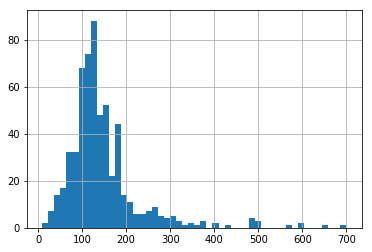

In [45]:
# create a histogram for LoanAmount
df['LoanAmount'].hist(bins=50)

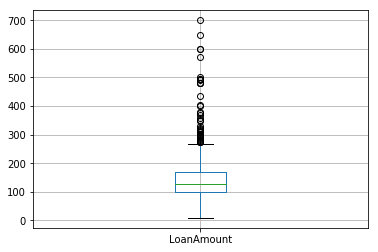

In [47]:
# create the boxplot for LoanAmount
df.boxplot(column='LoanAmount')

Again, we see some extreme values from the LoanAmount column. We should also keep in mind that there were missing values in this column as well. 

Categorical Variable Analysis

In [137]:
# Analyze Credit_History and Loan_Status
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

# show how many for each option
print("Frequency Table for Credit_History:")
print(temp1)

# cross tabulation between Credit_History and Loan_Status
print("\nProbability of getting a loan for each credit history group:")
print(temp2)

# marginalize the probabilities for temp2
#total_prob = temp2['Loan_Status'].iloc[0] + temp2['Loan_Status'].iloc[1]
#temp3 = temp2 / total_prob
#print(temp3)


Frequency Table for Credit_History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting a loan for each credit history group:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


"\n# marginalize the probabilities for temp2\ntotal_prob = temp2['Loan_Status'].iloc[0] + temp2['Loan_Status'].iloc[1]\ntemp3 = temp2 / total_prob\nprint(temp3)\n"

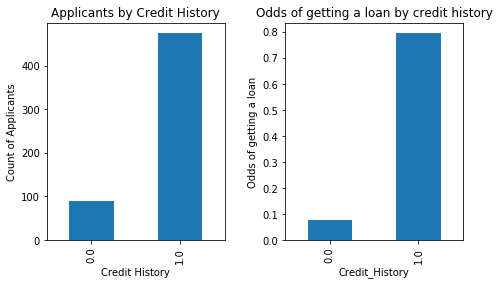

In [138]:
import matplotlib.pyplot as plt

# create the bar plot for temp1
figure = plt.figure(figsize=(7, 4))
ax1 = figure.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit History')
temp1.plot(kind='bar')

# create the bar plot for temp2
ax2 = figure.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Odds of getting a loan')
ax2.set_title('Odds of getting a loan by credit history')
temp2.plot(kind='bar', ax=ax2)
ax2.legend_.remove()

# same plot, but marginalized
#temp3.plot(kind='bar')

# shift the second subplot to the right
box = ax1.get_position()
box.x0 = box.x0 - 0.05
box.x1 = box.x1 - 0.05
ax1.set_position(box)


This reveals that having a valid credit history (Credit_History = 1) results in about an 8 fold increase in the odds of getting a loan. (The probabilites do not add up to 1 here because we are not taking into account the missing values for Credit_History)